# Module 05, 06 & 07 Assignment
## Understanding the ML Problem, Exploratory Data Analysis (EDA) and Basic Preprocessing
**Dataset:** Titanic – Machine Learning from Disaster (Kaggle)

Download the **train.csv** file from Kaggle’s Titanic competition and upload it to this notebook. Rename it to `titanic.csv` or update the file name in the loading cell.
Dataset link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

Total Marks: **100**

### Instructions
- This assignment covers:
  - **Module 05:** Basic ML problem framing (features, target, task type).
  - **Module 06:** Exploratory Data Analysis (EDA).
  - **Module 07:** Basic Preprocessing (handling missing values, encoding, scaling).
- Answer all questions inside this notebook using code and markdown.
- Do not delete the original question texts.
- At the end, the notebook should run from top to bottom without errors.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# ==============================
# Setup
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
print("Libraries imported.")



Libraries imported.


---
## Part 0: Understanding the ML Problem (Module 05) – 10 marks

### 0.1 Load the Dataset and Inspect (5 marks)
**Tasks:**
1. Load `titanic.csv` into a pandas DataFrame.
2. Show `.head()`, `.info()`, and `.describe()`.
3. Briefly look at the column names and data types.


In [ ]:
# 0.1 Load the Dataset and Inspect
# TODO: Change file name if needed.

df = pd.read_csv("titanic.csv")#Download the .csv file from Kaggle

print("Shape of dataset:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
display(df.describe())

Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe (numeric columns):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 0.2 Identify Features, Target and Task Type (5 marks)
**Tasks:**
Based on the dataset:
1. Identify the **target variable** for a predictive model.
2. List at least **5 potential feature columns** you could use.
3. State whether this is a **classification** or **regression** problem, and explain **why**.

Write your answers below.
1. Target Variable: My target variable is Survived, because using this column I can predict whether a passenger survived or not.
2. 5 Potential Feature Columns:

    a. Pclass: This column shows which class the passenger was in.

    b. Sex: The passenger’s gender is important for making accurate predictions.

    c. Age: The passenger’s age can help predict the survival outcome.

    d. Fare: The ticket price.

    e. Embarked: This indicates the port from which the passenger boarded.

3. This is a classification problem, because the outcome has only two possible classes, either the passenger survived or did not survive, which can be represented as 0 or 1 for the machine learning model.


#### **Your answers**
- Target variable:  
- Feature columns (at least 5):  
- Is this classification or regression, and why?:  

---
## Part A: Exploratory Data Analysis (EDA) – 45 marks

### 1. Initial Exploration and Cleaning Decisions (10 marks)
**Tasks:**
1. Show the number of unique values in each column.
2. Identify columns that are clearly **IDs or high-cardinality text** (for example, `PassengerId`, `Name`, `Ticket`).
3. Decide which of these columns you will **drop** for the rest of the analysis and justify in 2–3 sentences.


In [ ]:
# 1. Initial Exploration and Cleaning Decisions (Task 1 is given)
print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())


Unique values per column:
PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


2. Answer: Identified Columns

    a. PassengerId: This column is not useful for predicting whether a passenger survived or not, because it is just an identifier.

    b. Name: The name cannot help with prediction since it is text data with no meaningful pattern.

    c. Ticket: This column contains unique ticket codes in string format, which do not provide any useful patterns for the model.

    d. Cabin: This column has many missing values, which can create problems when training the model, and the remaining values do not provide useful patterns.

3. Answer:
    I will delete PassengerId, Name, Ticket, and Cabin, because these columns contain high-cardinality text values and do not help the model learn meaningful patterns for prediction.



#### Columns to drop and justification
- Columns dropped:  
- Justification (2–3 sentences):  

---
### 2. Univariate Analysis (15 marks)
**Tasks:**
- Plot histograms for numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot countplots for categorical features: `Sex`, `Pclass`, `Embarked`.
- Write **two to three insights** about the distributions and any obvious patterns.


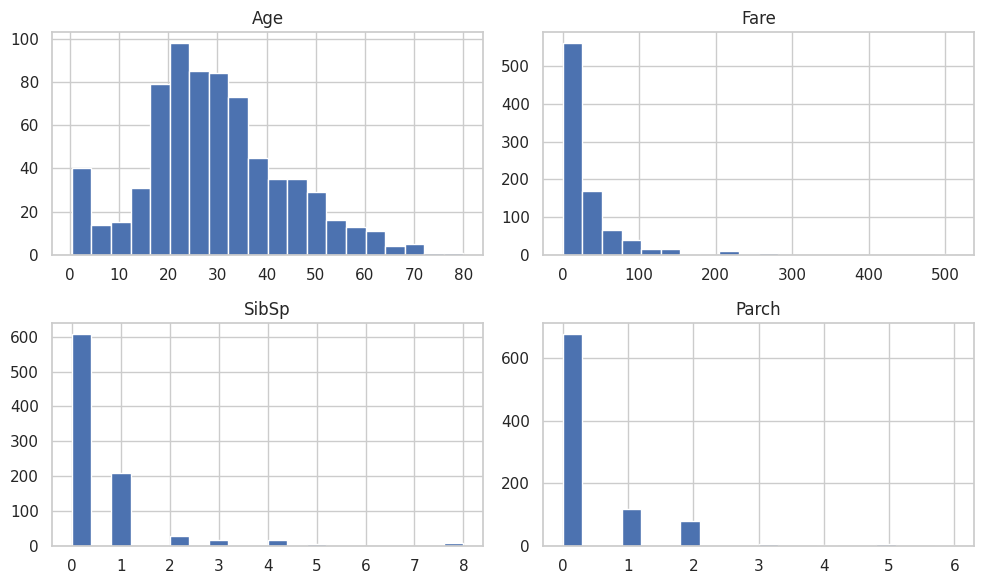

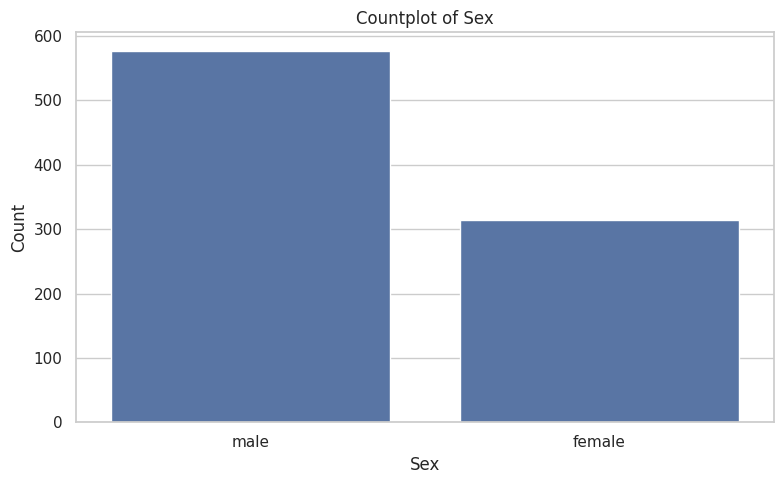

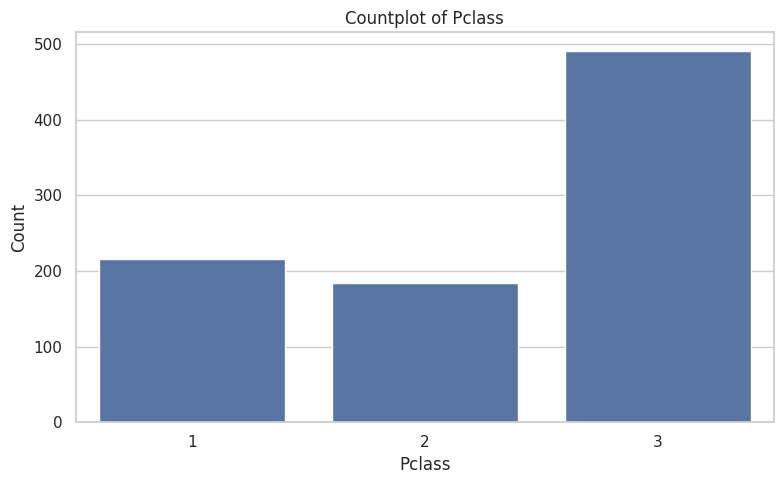

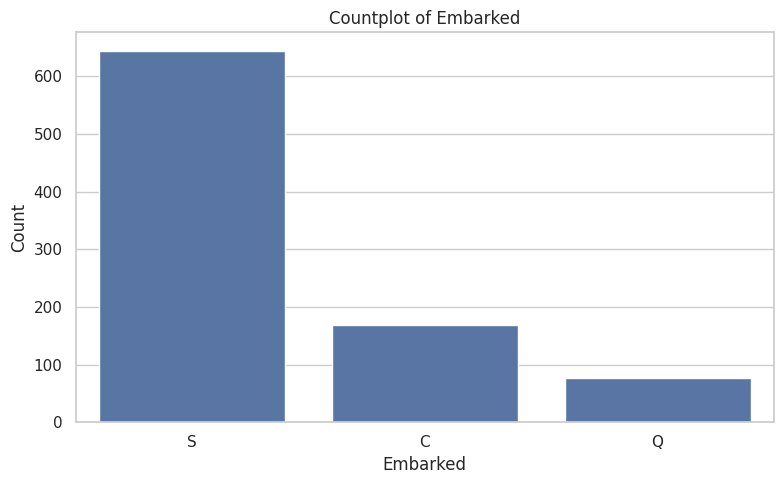

In [ ]:
# 2. Univariate Analysis

numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Histograms code is written for you
df[numeric_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Write Countplots code for key categorical variables [You need to complete]
cat_cols = ["Sex", "Pclass", "Embarked"]
for c in cat_cols:
  sns.countplot(x=c,data=df)
  plt.title(f"Countplot of {c}",fontsize=12)
  plt.xlabel(c)
  plt.ylabel("Count")
  plt.tight_layout()
  plt.show()


#### Write Your insights
- Insight 1:  
    Age: Most passengers are between 20 and 40 years old, while the number of very young and elderly passengers is much lower.
    
- Insight 2:  
    Sex: The number of male passengers on the ship was higher, with females making up about half of the total population.

- Insight 3:

    Pclass: The number of passengers in the 3rd class is much higher compared to other classes.



---
### 3. Bivariate Analysis with Target (15 marks)
Use `Survived` as the target variable.

**Tasks:**
- Compute and plot a **correlation heatmap** for numeric features, including `Survived`.
- Create a **pairplot** for: `Age`, `Fare`, `SibSp`, `Parch`, and `Survived`.
- Write **two to three insights**, including which variables seem associated with survival.


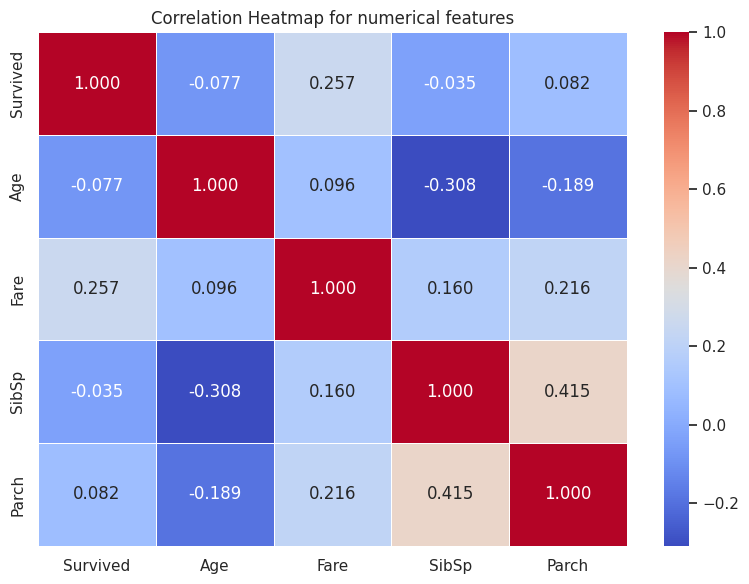

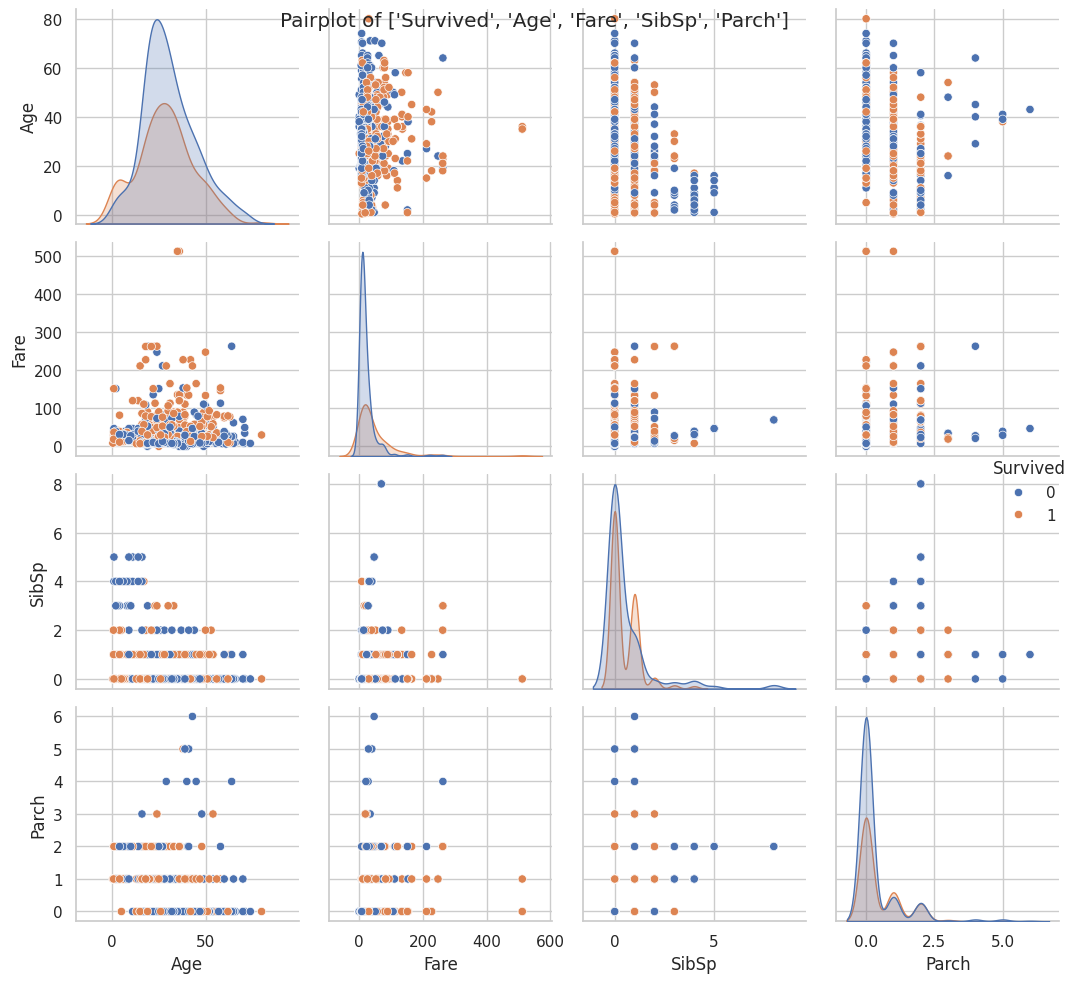

In [ ]:
# 3. Bivariate Analysis with Target

num_for_corr = ["Survived", "Age", "Fare", "SibSp", "Parch"]
corr_matrix = df[num_for_corr].corr()
## Complete this code block to generate correlation heatmap and pairplot [You need to complete]
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".3f",linewidths=0.5)
plt.title("Correlation Heatmap for numerical features")
plt.tight_layout()
plt.show()
# for col in num_for_corr:
sns.pairplot(df[num_for_corr],hue='Survived')
plt.tight_layout()
plt.suptitle(f"Pairplot of {num_for_corr}")
plt.show()

#### Your insights
- Insight 1:  There is a positive correlation of 0.257 between Survived and Fare, indicating that passengers who paid higher fares had a higher chance of survival.

- Insight 2: There is a negative correlation of -0.077 between Survived and Age, suggesting that older passengers had a lower chance of survival compared to younger ones. This could imply that children and women might have been rescued first on the ship.

- Insight 3:  Passengers who had family members such as children or spouses aboard (represented by SibSp) seem to have had a comparatively higher chance of survival.

---
### 4. Categorical vs Target Analysis (5 marks)
**Tasks:**
For each of the following categorical features: `Sex`, `Pclass`, `Embarked`:
- Plot a **bar chart** showing the proportion of passengers who survived in each category.
- Write **two short insights** about which categories have higher or lower survival chances.



Survival proportion by Sex:


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


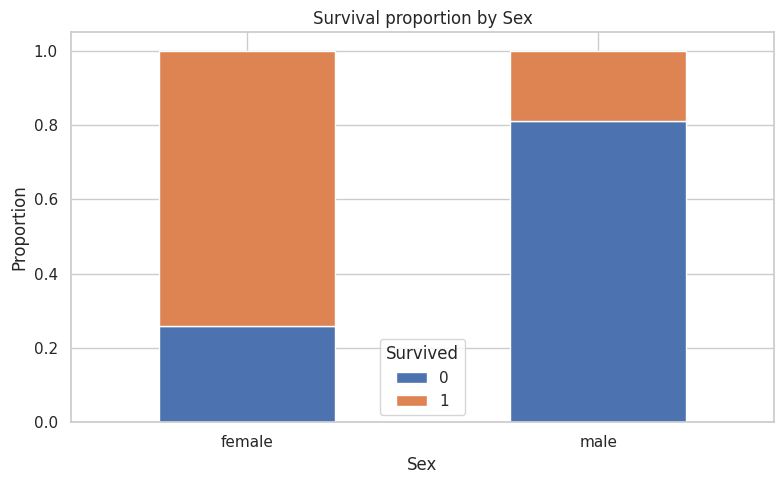


Survival proportion by Pclass:


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


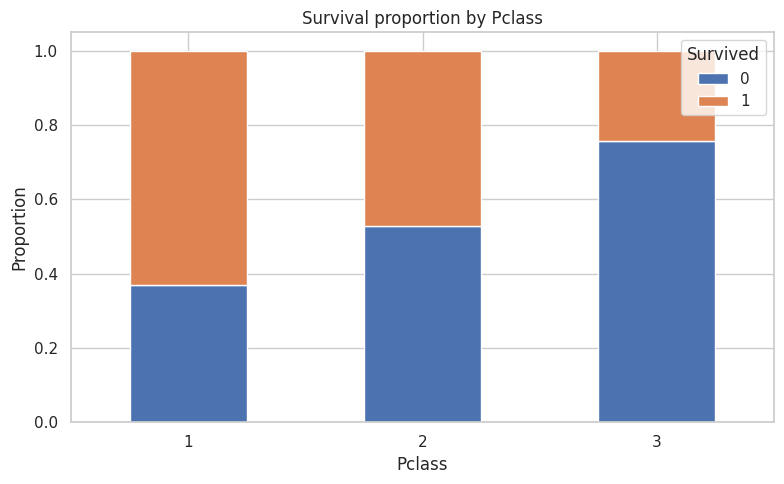


Survival proportion by Embarked:


Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


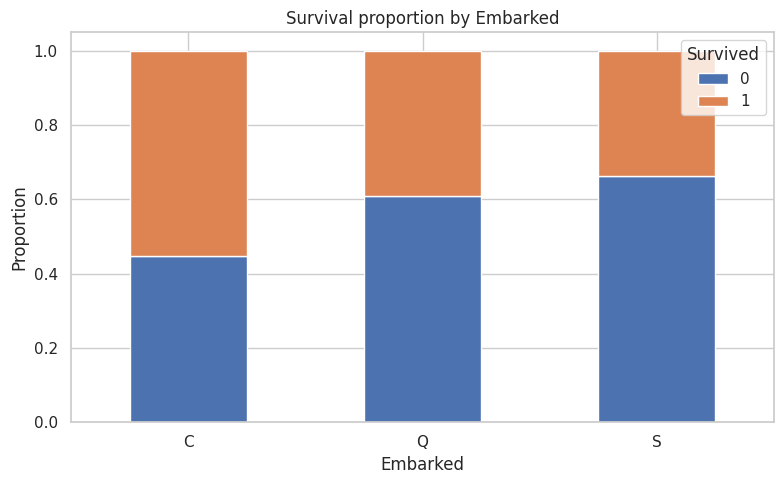

In [ ]:
# 4. Categorical vs Target Analysis [Bar chart code is written for you]

cat_target_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_target_cols:
    ct = pd.crosstab(df[c], df["Survived"], normalize="index")
    print(f"\nSurvival proportion by {c}:")
    display(ct)
    ct.plot(kind="bar", stacked=True)
    plt.title(f"Survival proportion by {c}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

#### Your insights
- Insight 1:  Among all passengers, female passengers had a much higher survival rate (74%).
This suggests that during the rescue process, women were given higher priority compared to men.

- Insight 2:  Among the passenger classes (Pclass), the highest survival rate was in Class 1 (62%).
The other two classes showed lower survival percentages:

    Class 2: 47%

    Class 3: 24%

---
## Part B: Basic Data Preprocessing – 45 marks

Focus: **Handling missing values, encoding categorical variables, and scaling numeric features.**

### 5. Handling Missing Values (10 marks)
**Tasks:**
1. Show the count of missing values in each column.
2. Decide how to handle missing values for:
   - `Age` (numeric)
   - `Embarked` (categorical)
   - `Cabin` (many missing values)
3. Implement your chosen strategy in code.
4. Show missing value counts again to confirm.
5. Explain your choices in **3–4 sentences**.



In [ ]:
# 5. Handling Missing Values

print("Missing values before:") #[Task 1 is done for you]
print(df.isna().sum())

# Drop Cabin (Complete this code block)
df = df.drop(columns=['Cabin'])

# Fill Age (Complete this code block)
age_median = df["Age"].median()
df["Age"] = df["Age"].fillna(age_median)

# Fill Embarked (Complete this code block)
embarked_mode = df['Embarked'].mode()[0]
df['Embarked']=df['Embarked'].fillna(embarked_mode)
print("\nMissing values after handling:")
print(df.isna().sum())

Missing values before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### Explanation of your strategy
- Why you dropped or kept `Cabin`:  
- Why you used median/mean for `Age`:  
- Why you used mode or another method for `Embarked`:  

Answer:

    Age : I want to fill the missing values in the Age column using the median.
    My reason for choosing the median is that it is not affected by outliers, so it gives a more reliable central value even when extreme values exist.

    Embarked: For the Embarked column, I plan to fill the missing values using the mode, which is ‘S’.
    The reason behind this decision is that Embarked is a categorical column with three categories, and among them, the highest number of passengers traveled from port S.

    Cabin: I also want to drop the Cabin column because it contains a large number of missing values — around 70%.
    The values are neither numeric nor clean categories, and since so many entries are missing, dropping this column should not cause any issue for training the model.

---
### 6. Encoding Categorical Variables (15 marks)
Focus on the following categorical features:
- `Sex`
- `Embarked`
- `Pclass` (treat as categorical)

**Tasks:**
- Use `OneHotEncoder` from sklearn to encode these features.
- Keep `Survived` and the main numeric features (`Age`, `Fare`, `SibSp`, `Parch`).
- Show the shape and head of the encoded DataFrame.


In [ ]:
# 6. Encoding Categorical Variables

df_enc = df.copy()

# Select features for encoding and keep important numeric ones
cat_features = ["Sex", "Embarked", "Pclass"]
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
target_col = "Survived"

# One hot encode categorical variables [You need to do]
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[cat_features])
encoded_df = pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(cat_features))
# Build final encoded DataFrame
df_model = pd.concat([
    df_enc[[target_col] + numeric_features],
    encoded_df
], axis=1)

print("Shape after encoding:", df_model.shape)
display(df_model.head())

Shape after encoding: (891, 13)


,Survived,Age,Fare,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,71.2833,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,26.0,7.9250,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,35.0,53.1000,1,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,35.0,8.0500,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


---
### 7. Scaling Numeric Features (15 marks)
**Tasks:**
- Use `StandardScaler` on the numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot boxplots of these features **before** and **after** scaling.
- Write **two sentences** explaining how scaling changes the numeric values and why it is useful before training some ML models.


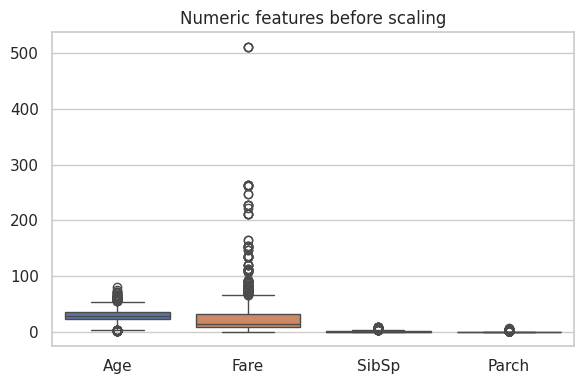

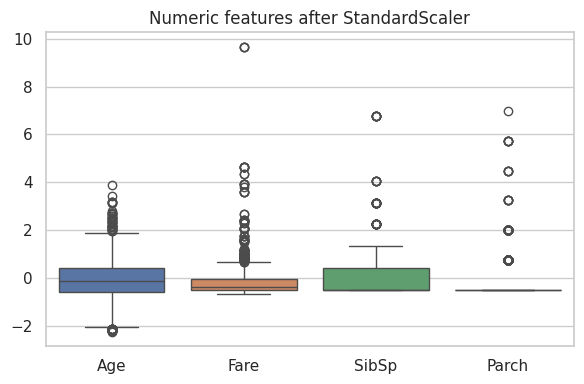

In [ ]:
# 7. Scaling Numeric Features

score_cols = ["Age", "Fare", "SibSp", "Parch"]

# Boxplot before scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_model[score_cols])
plt.title("Numeric features before scaling")
plt.tight_layout()
plt.show()

# Apply StandardScaler [You need to do]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df[score_cols])
df_scaled = pd.DataFrame(scaled,columns=score_cols)
# Boxplot after scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_scaled[score_cols])
plt.title("Numeric features after StandardScaler")
plt.tight_layout()
plt.show()

#### Your observations on scaling
- Sentence 1:  Scaling brings numeric values into a specific range (such as 0 to 1), which helps the machine understand and compare the data more easily. From the plot, we can see that before scaling, the numeric features were spread out widely — for example, Fare values extended close to 300, while SibSp and Parch ranged only between 0 and 5. But after scaling, this problem no longer exists, and all the values are now on a similar scale.

- Sentence 2:  This scaling is very important for training machine learning models; without it, the model may become biased toward features with larger values and produce skewed predictions.

---
### 8. Simple Feature Quality Check (5 marks)
**Tasks:**
- Show `.info()` of the final processed DataFrame (`df_scaled`).
- Confirm there are no missing values.
- Confirm that all remaining features are numeric and suitable for most ML models.
- Write **one short concluding remark** about dataset readiness.


In [ ]:
# 8. Simple Feature Quality Check
print(df_scaled.info())

print("\nTotal missing values in final DataFrame:", df_scaled.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   Fare    891 non-null    float64
 2   SibSp   891 non-null    float64
 3   Parch   891 non-null    float64
dtypes: float64(4)
memory usage: 28.0 KB
None

Total missing values in final DataFrame: 0


#### Final remark on dataset readiness
- Your remark:  My final remark is that the dataset is now much more machine-friendly and contains no missing values. In addition, all string values have been converted into numerical form so that the model can train effectively. To prevent the model from being biased toward features with larger values, the data has been scaled to a specific range, which will help the model make better and more accurate predictions.

---
## Submission
- Run all cells from top to bottom to make sure everything works.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.